In [1]:
import os
os.listdir("./traindata/")

['AlexNetModel.hdf5',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'best_weights_9.hdf5',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Rice_Brown_spot',
 'Rice_healthy',
 'Rice_hispa',
 'Rice_LeafBlast',
 'Rice_sheath_blight',
 'Rice_tungro',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 '

In [2]:
import os 
data_dir = "traindata/"
classes = os.listdir(data_dir)


import numpy as np
import pandas as pd

image_counts={}
for c in classes:
    try:
        path = data_dir + c
        count = len(os.listdir(path))
        image_counts[c]= count
    except:
        pass

df = pd.DataFrame.from_dict(image_counts, orient='index')
df

,0
Apple___Apple_scab,484
Apple___Black_rot,477
Apple___Cedar_apple_rust,420
Apple___healthy,482
Cherry_(including_sour)___healthy,436
Cherry_(including_sour)___Powdery_mildew,401
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,390
Corn_(maize)___Common_rust_,457
Corn_(maize)___healthy,445
Corn_(maize)___Northern_Leaf_Blight,457


In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

classifier = Sequential()

classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

classifier.add(Flatten())

classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))
classifier.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 384)        

In [4]:
classifier.load_weights('./traindata/best_weights_9.hdf5')

In [5]:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d_1
1 max_pooling2d_1
2 batch_normalization_1
3 conv2d_2
4 max_pooling2d_2
5 batch_normalization_2
6 conv2d_3
7 batch_normalization_3
8 conv2d_4
9 batch_normalization_4
10 conv2d_5
11 max_pooling2d_3
12 batch_normalization_5
13 flatten_1
14 dense_1
15 dropout_1
16 batch_normalization_6
17 dense_2
18 dropout_2
19 batch_normalization_7
20 dense_3
21 dropout_3
22 batch_normalization_8
23 dense_4


In [6]:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d_1
1 max_pooling2d_1
2 batch_normalization_1
3 conv2d_2
4 max_pooling2d_2
5 batch_normalization_2
6 conv2d_3
7 batch_normalization_3
8 conv2d_4
9 batch_normalization_4
10 conv2d_5
11 max_pooling2d_3
12 batch_normalization_5
13 flatten_1
14 dense_1
15 dropout_1
16 batch_normalization_6
17 dense_2
18 dropout_2
19 batch_normalization_7


In [7]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 384)        

In [8]:
from keras import optimizers
classifier.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
base_dir = "./traindata"

training_set = train_datagen.flow_from_directory(base_dir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory('./validation',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 21614 images belonging to 38 classes.
Found 795 images belonging to 38 classes.


In [10]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Peach___Bacterial_spot': 14, 'Peach___healthy': 15, 'Pepper__bell___Bacterial_spot': 16, 'Pepper__bell___healthy': 17, 'Potato___Early_blight': 18, 'Potato___Late_blight': 19, 'Potato___healthy': 20, 'Rice_Brown_spot': 21, 'Rice_LeafBlast': 22, 'Rice_healthy': 23, 'Rice_hispa': 24, 'Rice_sheath_blight': 25, 'Rice_tungro': 26, 'Strawberry___Leaf_scorch': 27, 'Strawberry___healthy': 28, 'Tomato___Bacterial_spot': 29, 'Tomato___Early_blight': 30, 'Tomato___Late_blight': 31, 'Tomato___Leaf_Mold': 32, 'Tomato___S

In [11]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Rice_Brown_spot', 'Rice_LeafBlast', 'Rice_healthy', 'Rice_hispa', 'Rice_sheath_blight', 'Rice_tungro', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___T

In [12]:
train_num = training_set.samples
valid_num = valid_set.samples

In [13]:
from keras.callbacks import ModelCheckpoint
weightpath = "best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

history = classifier.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=10,
                         validation_steps=valid_num//batch_size,
                         )

filepath="AlexNetModel.hdf5" 

  
classifier.save(filepath)

Epoch 1/10


C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 107 could not be retrieved. It could be because a worker has died.
  UserWarning)


 26/168 [===>..........................] - ETA: 34:03 - loss: 10.4486 - accuracy: 0.1499

C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 163 could not be retrieved. It could be because a worker has died.
  UserWarning)


 27/168 [===>..........................] - ETA: 39:29 - loss: 10.3593 - accuracy: 0.1516

C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 164 could not be retrieved. It could be because a worker has died.
  UserWarning)


168/168 [==============================] - 1972s 12s/step - loss: 4.5369 - accuracy: 0.3858 - val_loss: 1.7247 - val_accuracy: 0.5781
Epoch 2/10
168/168 [==============================] - 1695s 10s/step - loss: 1.0819 - accuracy: 0.6980 - val_loss: 0.9539 - val_accuracy: 0.7316
Epoch 3/10
168/168 [==============================] - 1788s 11s/step - loss: 0.7699 - accuracy: 0.7692 - val_loss: 0.7324 - val_accuracy: 0.7766
Epoch 4/10
168/168 [==============================] - 1752s 10s/step - loss: 0.6763 - accuracy: 0.7905 - val_loss: 0.5552 - val_accuracy: 0.8171
Epoch 5/10
168/168 [==============================] - 1745s 10s/step - loss: 0.6225 - accuracy: 0.8011 - val_loss: 0.3799 - val_accuracy: 0.8081
Epoch 6/10
168/168 [==============================] - 1693s 10s/step - loss: 0.5866 - accuracy: 0.8116 - val_loss: 0.4462 - val_accuracy: 0.8246
Epoch 7/10
 52/168 [========>.....................] - ETA: 19:31 - loss: 0.5550 - accuracy: 0.8208

C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 144 could not be retrieved. It could be because a worker has died.
  UserWarning)


168/168 [==============================] - 1830s 11s/step - loss: 0.5588 - accuracy: 0.8185 - val_loss: 0.6681 - val_accuracy: 0.8186
Epoch 8/10
168/168 [==============================] - 1908s 11s/step - loss: 0.5362 - accuracy: 0.8230 - val_loss: 0.4615 - val_accuracy: 0.8320
Epoch 9/10
157/168 [===========================>..] - ETA: 2:00 - loss: 0.5277 - accuracy: 0.8260

C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 47 could not be retrieved. It could be because a worker has died.
  UserWarning)


160/168 [===========================>..] - ETA: 1:31 - loss: 0.5271 - accuracy: 0.8261

C:\Users\DELL\anaconda3\envs\tf\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


168/168 [==============================] - 2041s 12s/step - loss: 0.5268 - accuracy: 0.8262 - val_loss: 0.5509 - val_accuracy: 0.8231
Epoch 10/10
168/168 [==============================] - 1863s 11s/step - loss: 0.5110 - accuracy: 0.8289 - val_loss: 0.5889 - val_accuracy: 0.8276


In [14]:
classifier.save("DiseaseIdentification.h5")

In [184]:
from keras.preprocessing import image
import numpy as np
image_path = "./validation/tomatoyellowleafcurlvirus/1 (1).JPG"
new_img=image.load_img(image_path, target_size=(224,224))
img= image.img_to_array(new_img)
img=np.expand_dims(img, axis=0)
img = img/255

img_class = classifier.predict_classes(img)
prediction = classifier.predict(img)
print(img_class)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
print(class_name)


[35]
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [126]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 6, 'Corn_(maize)___Common_rust_': 7, 'Corn_(maize)___Northern_Leaf_Blight': 8, 'Corn_(maize)___healthy': 9, 'Grape___Black_rot': 10, 'Grape___Esca_(Black_Measles)': 11, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12, 'Grape___healthy': 13, 'Peach___Bacterial_spot': 14, 'Peach___healthy': 15, 'Pepper__bell___Bacterial_spot': 16, 'Pepper__bell___healthy': 17, 'Potato___Early_blight': 18, 'Potato___Late_blight': 19, 'Potato___healthy': 20, 'Rice_Brown_spot': 21, 'Rice_LeafBlast': 22, 'Rice_healthy': 23, 'Rice_hispa': 24, 'Rice_sheath_blight': 25, 'Rice_tungro': 26, 'Strawberry___Leaf_scorch': 27, 'Strawberry___healthy': 28, 'Tomato___Bacterial_spot': 29, 'Tomato___Early_blight': 30, 'Tomato___Late_blight': 31, 'Tomato___Leaf_Mold': 32, 'Tomato___S

In [25]:
import matplotlib.pyplot as plt

In [27]:
history = history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


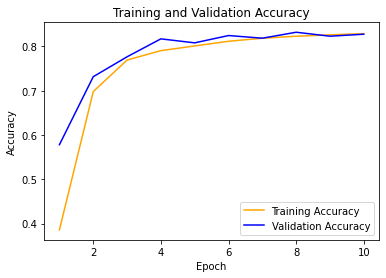

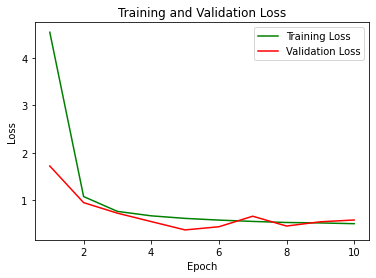

In [229]:
import seaborn as sns


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='orange', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [199]:
y_true=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35]
y_pred=[0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,17,1,1,1,0,1,1,1,1,1,16,1,5,19,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,29,2,16,4,4,3,4,4,19,4,4,4,4,3,4,4,4,4,4,6,6,6,6,8,6,6,6,6,8,6,6,6,8,6,6,6,6,6,6,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,11,11,10,10,10,10,10,10,10,10,10,10,30,10,11,11,11,10,11,11,11,11,11,11,11,11,11,11,11,11,12,11,11,11,12,12,12,12,12,12,12,12,12,12,10,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,16,19,14,16,14,19,14,14,14,16,14,14,14,14,19,14,14,15,15,15,15,15,15,15,15,15,15,15,15,22,15,15,23,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,14,16,16,16,16,30,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,19,17,19,17,17,17,18,18,20,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,19,20,20,20,20,20,27,2,26,23,23,23,23,22,23,23,22,22,22,22,23,23,21,21,21,21,23,23,23,23,23,23,23,23,23,23,23,23,23,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,21,22,22,22,22,23,23,23,23,17,0,23,32,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,25,25,25,25,25,25,25,21,25,25,25,25,25,10,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,18,26,26,26,26,26,26,26,26,26,26,26,26,26,26,28,28,28,19,19,19,19,19,28,28,28,28,28,27,27,27,28,28,28,28,27,27,27,27,27,27,27,27,27,27,27,26,27,27,27,27,27,27,27,27,27,27,27,27,29,29,29,29,29,29,29,29,29,3,29,29,29,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,29,30,30,30,29,30,30,33,30,30,30,30,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,31,31,31,30,30,30,30,30,30,30,31,31,31,31,2,31,31,31,31,31,32,32,32,32,32,31,32,32,31,32,32,32,33,32,32,32,32,32,32,32,33,30,33,33,33,30,33,33,33,33,33,33,33,32,33,33,33,33,33,33,34,34,34,34,34,34,34,34,34,34,34,34,34,34,33,34,34,33,34,34,36,36,36,36,36,36,36,36,34,36,36,36,36,36,36,36,36,36,36,36,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35]


In [206]:
print(metrics.confusion_matrix(y_true, y_pred))

[[18  0  0 ...  0  0  0]
 [ 1 17  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  1 18  0]
 [ 0  0  0 ...  0  0 29]]


In [207]:

print(metrics.classification_report(y_true, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.900     0.900     0.900        20
           1      1.000     0.850     0.919        20
           2      0.870     1.000     0.930        20
           3      0.800     1.000     0.889        20
           4      1.000     0.700     0.824        20
           5      1.000     0.950     0.974        20
           6      1.000     0.850     0.919        20
           7      1.000     0.950     0.974        20
           8      0.833     1.000     0.909        20
           9      1.000     1.000     1.000        20
          10      0.850     0.850     0.850        20
          11      0.900     0.900     0.900        20
          12      0.950     0.950     0.950        20
          13      1.000     1.000     1.000        20
          14      0.933     0.700     0.800        20
          15      1.000     0.900     0.947        20
          16      0.783     0.900     0.837        20
          17      0.900    

In [226]:
print(accuracy_score(y_true, y_pred)) 

0.8289308176100629


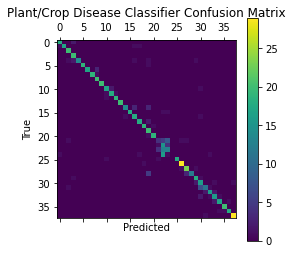

In [222]:
from sklearn.metrics import confusion_matrix

import pylab as pl 
cm = confusion_matrix(y_true, y_pred) 


pl.matshow(cm) 
pl.title('Plant/Crop Disease Classifier Confusion Matrix') 
pl.colorbar() 
plt.xlabel('Predicted') 
plt.ylabel('True')
pl.show()

In [212]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
import seaborn as sns

In [224]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Rice_Brown_spot', 'Rice_LeafBlast', 'Rice_healthy', 'Rice_hispa', 'Rice_sheath_blight', 'Rice_tungro', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

def plot_confusion_matrix(cm, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18  0  0 ...  0  0  0]
 [ 1 17  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  1 18  0]
 [ 0  0  0 ...  0  0 29]]


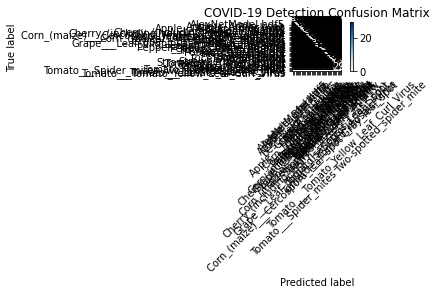

In [225]:
plt.figure()
plot_confusion_matrix(cm,
                      title='COVID-19 Detection Confusion Matrix',cmap=plt.cm.Blues)